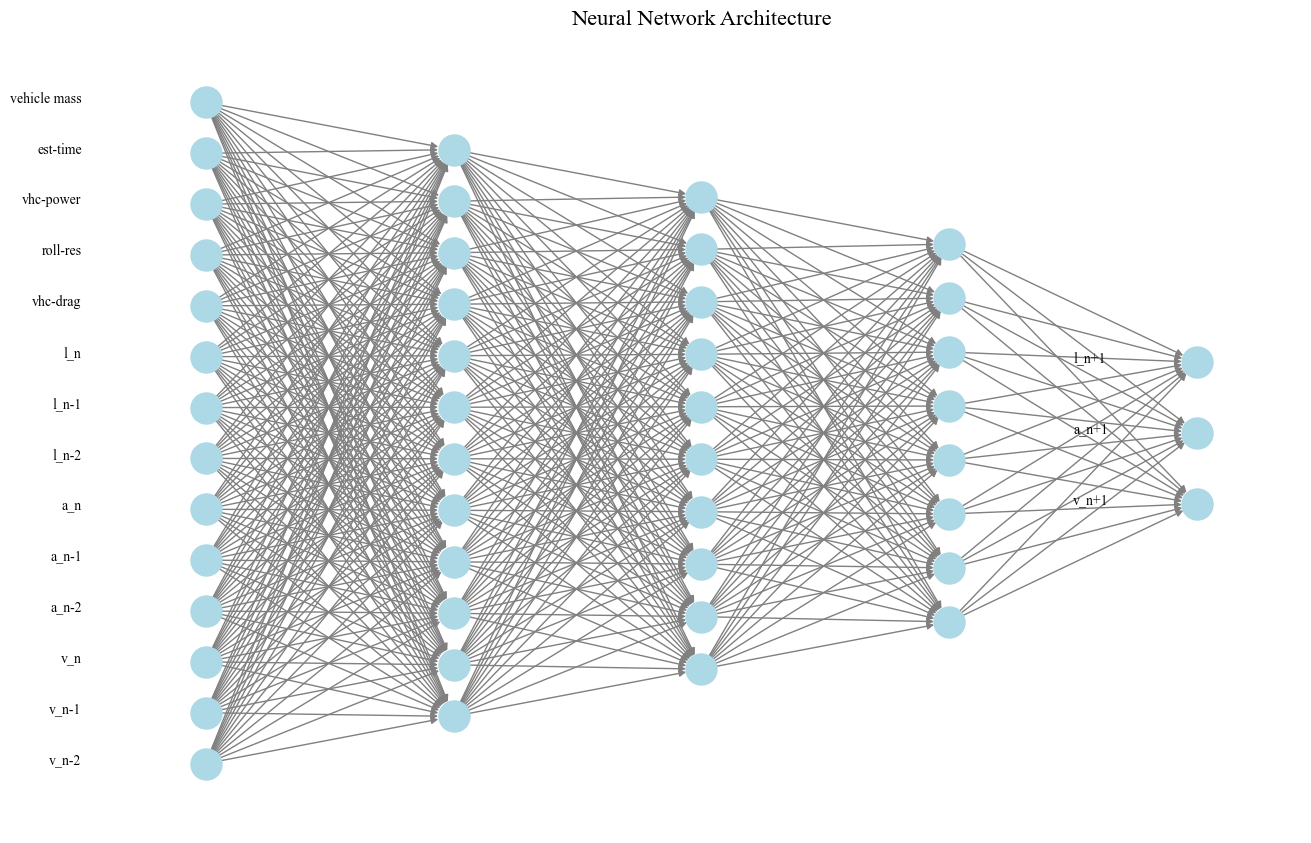

In [3]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

def draw_neural_network_sideways(input_labels, hidden_layers, output_labels):
    layers = [len(input_labels)] + hidden_layers + [len(output_labels)]
    G = nx.DiGraph()

    # Define positions of nodes
    positions = {}
    current_x = 0

    for i, layer_size in enumerate(layers):
        y_positions = np.linspace(-layer_size / 2, layer_size / 2, layer_size)
        for j, y in enumerate(y_positions):
            positions[f"{i}-{j}"] = (current_x, y)
        current_x += 1

    # Add nodes and edges to the graph
    for i in range(len(layers) - 1):
        for j in range(layers[i]):
            for k in range(layers[i + 1]):
                G.add_edge(f"{i}-{j}", f"{i+1}-{k}")

    # Draw the network
    plt.figure(figsize=(12, 8))
    nx.draw(G, pos=positions, with_labels=False, node_size=500, node_color="lightblue", edge_color="gray")

    # Add input and output labels
    for i, label in enumerate(input_labels):
        plt.text(-0.5, positions[f"0-{i}"][1], label, fontsize=10, ha="right", fontname="Times New Roman")

    for i, label in enumerate(output_labels):
        plt.text(len(layers) - 1.5, positions[f"{len(layers) - 1}-{i}"][1], label, fontsize=10, ha="left", fontname="Times New Roman")

    plt.title("Neural Network Architecture", fontsize=16, fontname="Times New Roman")
    plt.show()

# Define the network architecture
input_labels = ["v_n-2", "v_n-1", "v_n", "a_n-2", "a_n-1", "a_n", "l_n-2", "l_n-1", "l_n", "vhc-drag", "roll-res", "vhc-power", "est-time", "vehicle mass"]
hidden_layers = [12, 10, 8]  # Adjusted to reduce unnecessary nodes
output_labels = ["v_n+1", "a_n+1", "l_n+1"]

# Draw the network
draw_neural_network_sideways(input_labels, hidden_layers, output_labels)


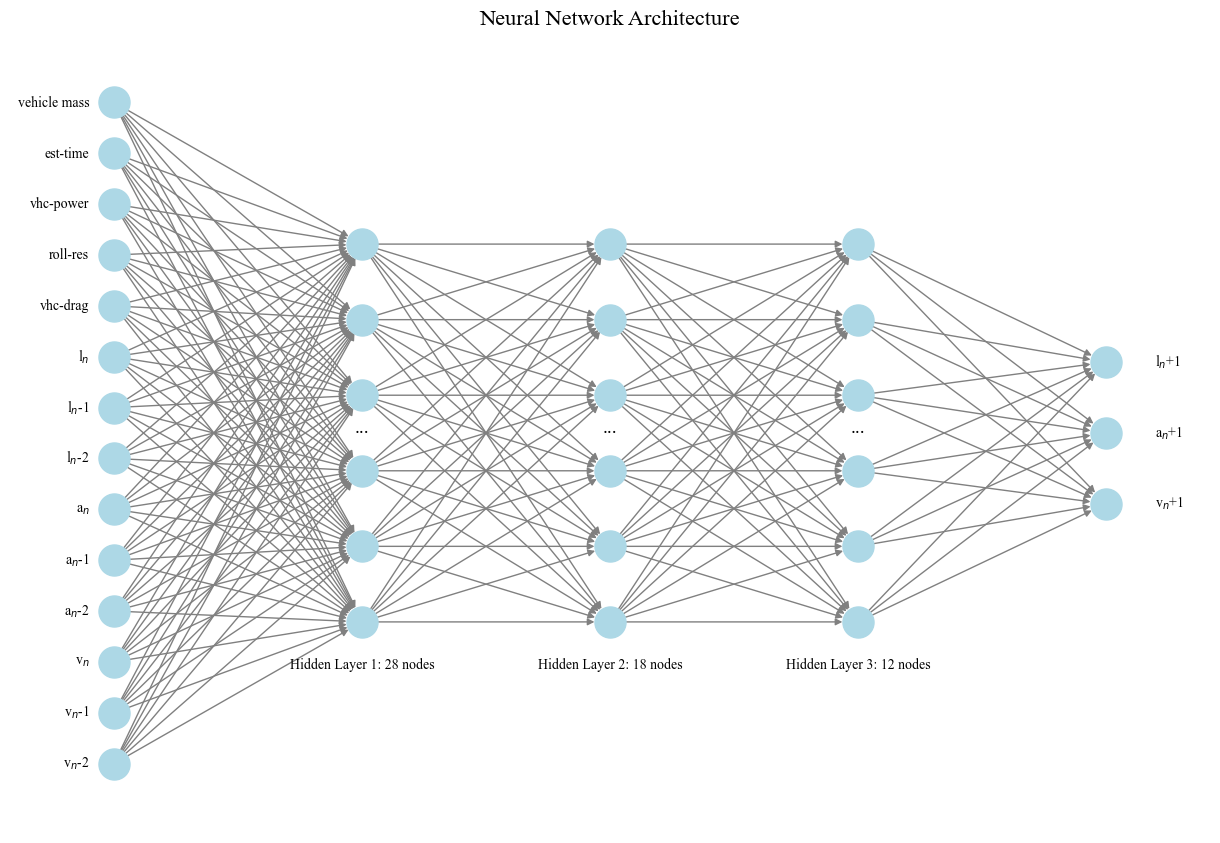

In [9]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

def draw_neural_network_sideways(input_labels, hidden_layers, output_labels):
    layers = [len(input_labels)] + hidden_layers + [len(output_labels)]
    G = nx.DiGraph()

    # Define positions of nodes
    positions = {}
    current_x = 0
    layer_annotations = []
    layer_y = []

    for i, layer_size in enumerate(layers):
        if i == 0:  # Input layer
            y_positions = np.linspace(-layer_size, layer_size, layer_size)
            for j, y in enumerate(y_positions):
                positions[f"{i}-{j}"] = (current_x, y)
        elif i == len(layers) - 1:  # Output layer
            y_positions = np.linspace(-layer_size, layer_size, layer_size)
            for j, y in enumerate(y_positions):
                positions[f"{i}-{j}"] = (current_x, y)
        else:  # Hidden layers
            visible_nodes = 6
            y_positions = np.linspace(-8, 8, visible_nodes)
            for j, y in enumerate(y_positions):
                positions[f"{i}-{j}"] = (current_x, y)
            layer_y.append(y_positions)
            layer_annotations.append((current_x, f"Hidden Layer {i}: {layer_size} nodes"))
        current_x += 1

    # Add nodes and edges to the graph
    for i in range(len(layers) - 1):
        for j in range(layers[i]):
            for k in range(layers[i + 1]):
                if f"{i}-{j}" in positions and f"{i+1}-{k}" in positions:
                    G.add_edge(f"{i}-{j}", f"{i+1}-{k}")

    # Draw the network
    plt.figure(figsize=(12, 8))
    nx.draw(G, pos=positions, with_labels=False, node_size=500, node_color="lightblue", edge_color="gray")

    # Add input and output labels
    for i, label in enumerate(input_labels):
        label = label.replace("_n", r"$_n$")
        plt.text(-0.1, positions[f"0-{i}"][1], label, fontsize=10, ha="right", va="center", fontname="Times New Roman")

    for i, label in enumerate(output_labels):
        label = label.replace("_n", r"$_n$")
        plt.text(len(layers) - 0.8, positions[f"{len(layers) - 1}-{i}"][1], label, fontsize=10, ha="left", va="center", fontname="Times New Roman")

    # Add skipped nodes and layer annotations
    for i, y_positions in enumerate(layer_y):
        layer_center = (y_positions[0] + y_positions[-1]) / 2
        plt.text(i + 1, 0, "...", fontsize=14, ha="center", fontname="Times New Roman")
    for x, annotation in layer_annotations:
        plt.text(x, -10, annotation, fontsize=10, ha="center", fontname="Times New Roman")

    plt.title("Neural Network Architecture", fontsize=16, fontname="Times New Roman")
    plt.show()

# Define the network architecture
input_labels = ["v_n-2", "v_n-1", "v_n", "a_n-2", "a_n-1", "a_n", "l_n-2", "l_n-1", "l_n", "vhc-drag", "roll-res", "vhc-power", "est-time", "vehicle mass"]
hidden_layers = [28, 18, 12]  # Total nodes for each hidden layer
output_labels = ["v_n+1", "a_n+1", "l_n+1"]

# Draw the network
draw_neural_network_sideways(input_labels, hidden_layers, output_labels)
